In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load the datasets
df_features = pd.read_csv('test.csv')  # Update with actual path
df_target = pd.read_csv('sample_submission.csv')  # Update with actual path

# Display the first few rows of both datasets to understand their structure
print("Features Dataset:")
print(df_features.head())

print("\nTarget Dataset (SalePrice):")
print(df_target.head())


In [6]:
# Merge the datasets on 'Id'
df = pd.merge(df_features, df_target, on='Id')

# Selecting relevant features: GrLivArea (square footage), Bedroom, FullBath, and HalfBath
df = df[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']]

# Rename 'BedroomAbvGr' to 'Bedroom' for consistency
df = df.rename(columns={'BedroomAbvGr': 'Bedroom'})

# Display the selected features
print("\nSelected Features:")
print(df.head())



Selected Features:
       SalePrice  GrLivArea  Bedroom  FullBath  HalfBath
0  169277.052498        896        2         1         0
1  187758.393989       1329        3         1         1
2  183583.683570       1629        3         2         1
3  179317.477511       1604        3         2         1
4  150730.079977       1280        2         2         0


In [7]:
# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the cleaned data
print("\nCleaned Data:")
print(df_cleaned.head())



Missing Values Check:
SalePrice    0
GrLivArea    0
Bedroom      0
FullBath     0
HalfBath     0
dtype: int64

Cleaned Data:
       SalePrice  GrLivArea  Bedroom  FullBath  HalfBath
0  169277.052498        896        2         1         0
1  187758.393989       1329        3         1         1
2  183583.683570       1629        3         2         1
3  179317.477511       1604        3         2         1
4  150730.079977       1280        2         2         0


In [8]:
# Features (X) and target variable (y)
X = df_cleaned[['GrLivArea', 'Bedroom', 'FullBath', 'HalfBath']]
y = df_cleaned['SalePrice']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of training and test sets
print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")



Training Data Shape: (1167, 4)
Test Data Shape: (292, 4)


In [9]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Output the model coefficients
print(f"\nModel Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")



Model Coefficients: [ 1.08626765e+01  1.35764526e+04 -2.71604975e+03 -2.64758632e+03]
Intercept: 129496.7110018511


In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 86189090.9150172
R-squared: 0.6433372967898414


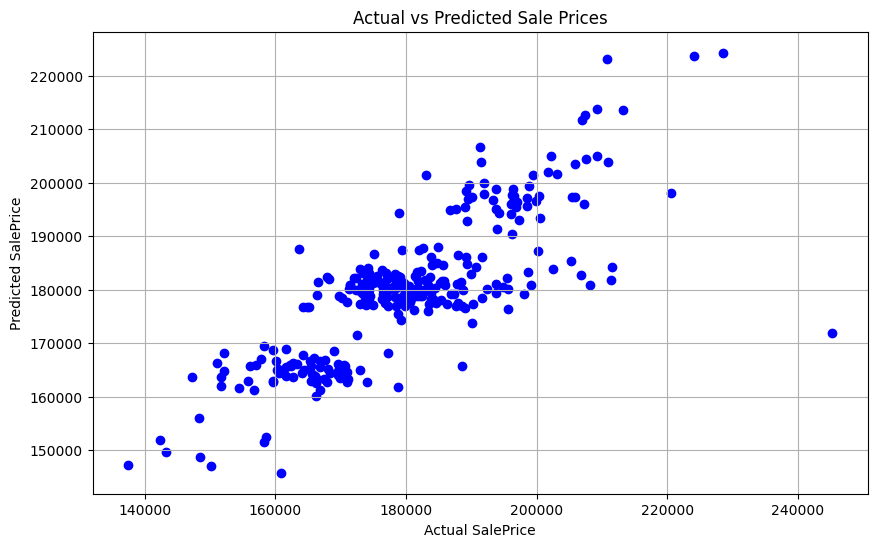

In [11]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Sale Prices')
plt.grid(True)
plt.show()


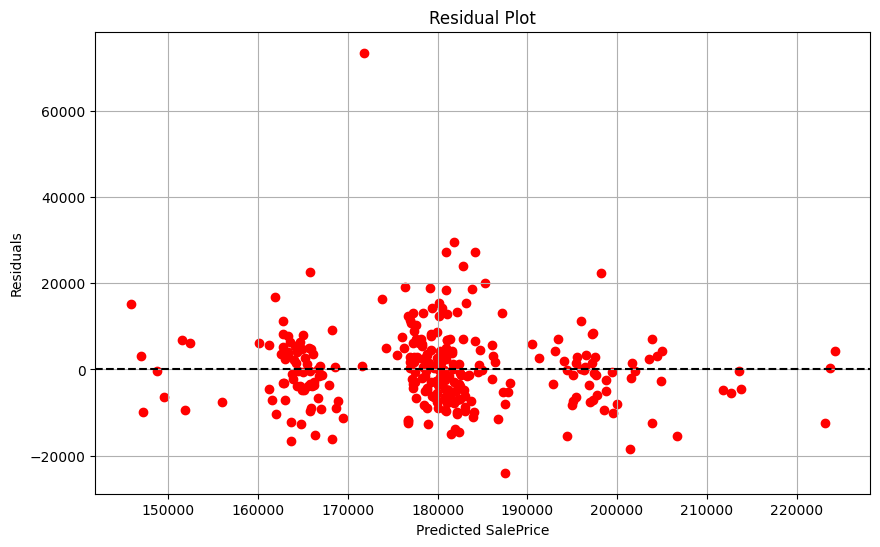

In [12]:
# Residual plot to check for any patterns in the residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


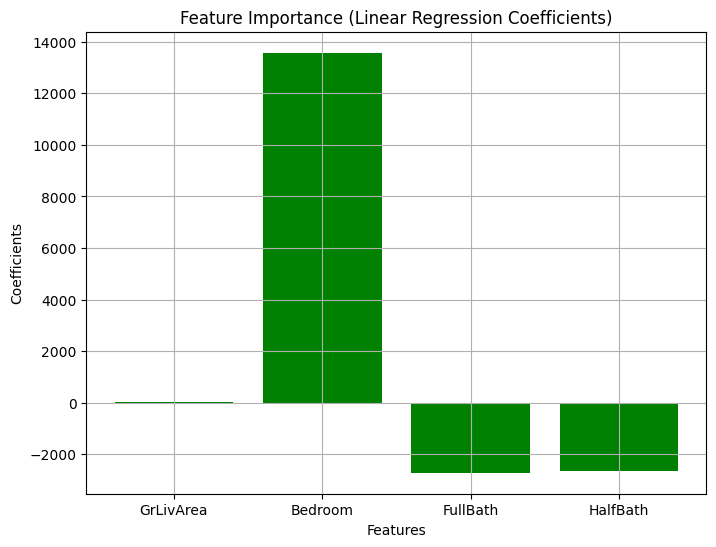

In [13]:
# Plot the feature importance (coefficients of the linear regression model)
plt.figure(figsize=(8, 6))
features = ['GrLivArea', 'Bedroom', 'FullBath', 'HalfBath']
plt.bar(features, model.coef_, color='green')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.grid(True)
plt.show()
